# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
spaceship.shape

(8693, 14)

**Check for data types**

In [4]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [6]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [7]:
spaceship_clean = spaceship.dropna()
spaceship_clean.isna().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [9]:
spaceship_clean['Cabin'].unique()


array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [50]:
spaceship_trans = spaceship_clean

In [51]:
spaceship_trans['Cabin'] = spaceship_clean['Cabin'].str[0]
spaceship_trans['Cabin'].unique()

C:\Users\Carlota\AppData\Local\Temp\ipykernel_17416\2910688578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_trans['Cabin'] = spaceship_clean['Cabin'].str[0]


array(['B', 'F', 'A', 'G', 'E', 'C', 'D', 'T'], dtype=object)

- Drop PassengerId and Name

In [52]:
spaceship_trans = spaceship_trans.drop(columns=["PassengerId", "Name"])

In [53]:
spaceship_trans.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

- For non-numerical columns, do dummies.

In [54]:
spaceship_trans.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [55]:
spaceship_trans['VIP'].unique()

array([False, True], dtype=object)

In [56]:
spaceship_trans['Transported'].unique()

array([False,  True])

In [57]:
spaceship_trans = pd.get_dummies(spaceship_trans, columns=['Destination', 'VIP', 'HomePlanet','CryoSleep', 'Cabin'])

In [58]:
spaceship_trans

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,CryoSleep_False,CryoSleep_True,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False


**Perform Train Test Split**

In [59]:
features = spaceship_trans.drop(columns=["Transported"], axis = 1)
target = spaceship_trans["Transported"]

In [60]:
features

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,...,CryoSleep_False,CryoSleep_True,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,True,...,True,False,False,True,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,False,True,True,...,True,False,False,False,False,False,False,True,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,True,...,True,False,True,False,False,False,False,False,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,False,True,True,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,True,False,False,False,...,True,False,True,False,False,False,False,False,False,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,False,True,True,...,True,False,False,False,False,False,False,False,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False


In [61]:
#your code here
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [62]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,...,CryoSleep_False,CryoSleep_True,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
3432,32.0,0.0,0.0,0.0,0.0,0.0,False,False,True,True,...,False,True,False,False,False,False,True,False,False,False
7312,4.0,0.0,0.0,0.0,0.0,0.0,False,False,True,True,...,False,True,False,False,False,False,False,False,True,False
2042,30.0,0.0,236.0,0.0,1149.0,0.0,False,False,True,True,...,True,False,False,False,False,False,False,True,False,False
4999,17.0,13.0,0.0,565.0,367.0,1.0,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
5755,26.0,0.0,0.0,0.0,0.0,0.0,False,False,True,True,...,False,True,False,False,False,False,False,False,True,False


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [63]:
#your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

In [64]:
#your code here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

- Evaluate your model's performance. Comment it

In [65]:
#your code here
knn.score(X_test, y_test)

0.7874432677760969

In [66]:
l = []
for i in range(5,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    r2 = knn.score(X_test, y_test)
    l.append(r2)
    
    
    print(f"k = {i}  || R^2 = {r2}")

k = 5  || R^2 = 0.7692889561270801
k = 6  || R^2 = 0.7723146747352496
k = 7  || R^2 = 0.7874432677760969
k = 8  || R^2 = 0.7851739788199698
k = 9  || R^2 = 0.7881996974281392
k = 10  || R^2 = 0.783661119515885
k = 11  || R^2 = 0.7859304084720121
k = 12  || R^2 = 0.7866868381240545
k = 13  || R^2 = 0.7912254160363086
k = 14  || R^2 = 0.7889561270801816
k = 15  || R^2 = 0.7874432677760969
k = 16  || R^2 = 0.7904689863842662
k = 17  || R^2 = 0.794251134644478
k = 18  || R^2 = 0.7859304084720121
k = 19  || R^2 = 0.7866868381240545
k = 20  || R^2 = 0.7881996974281392
k = 21  || R^2 = 0.7874432677760969
k = 22  || R^2 = 0.7783661119515886
k = 23  || R^2 = 0.7829046898638427
k = 24  || R^2 = 0.7851739788199698
k = 25  || R^2 = 0.7851739788199698
k = 26  || R^2 = 0.7806354009077155
k = 27  || R^2 = 0.7806354009077155
k = 28  || R^2 = 0.773071104387292
k = 29  || R^2 = 0.7783661119515886
k = 30  || R^2 = 0.7783661119515886
k = 31  || R^2 = 0.7829046898638427
k = 32  || R^2 = 0.773071104387292
k

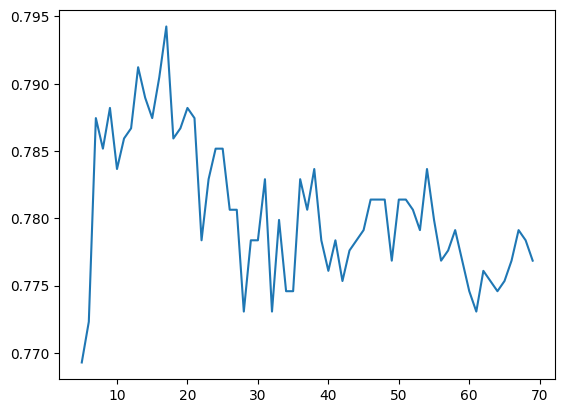

In [67]:
import matplotlib.pyplot as plt
plt.plot(list(range(5,70)), l)

In [68]:
max_precision = max(l)
k = l.index(max_precision)
print(f'The correct parameter k is {k}')

The correct parameter k is 12
